In [13]:
import subprocess
from subprocess import Popen
import sys
import pandas as pd
import matplotlib.pyplot as plt
import argparse
import statistics
import mplhep as hep
from matplotlib import gridspec
import datetime
import numpy as np
timestamp = datetime.datetime.now()

In [9]:
import os
os.path.isfile('results/multiple_results/multiple_log.txt')

True

In [3]:
mlog = 'results/multiple_results/multiple_log.txt'
mpng = 'results/multiple_results/'

In [12]:
df_alps = pd.read_csv('results/alps_results/csv/4alps_20s_10000e.csv')
df_ser = pd.read_csv('results/serial_results/csv/4serial_20s_10000e.csv')

cuda1 = pd.read_csv('results/cuda_results/csv/4cuda1_20s_10000e.csv')
cuda2 = pd.read_csv('results/cuda_results/csv/4cuda2_20s_20000e.csv')
cuda3 = pd.read_csv('results/cuda_results/csv/4cuda3_20s_20000e.csv')

alpc1 = pd.read_csv('results/alpc_results/csv/4alpc1_20s_20000e.csv')
alpc2 = pd.read_csv('results/alpc_results/csv/4alpc2_20s_20000e.csv')
alpc3 = pd.read_csv('results/alpc_results/csv/4alpc3_20s_20000e.csv')

In [5]:
def stdDev(dataframe1,dataframe2):
    
    df_streams1 = dataframe1['nStreams']
    df_throughput1 = dataframe1['throughput']
    streams_pick1 = [df_streams1[0],df_streams1[1],df_streams1[3],df_streams1[7],df_streams1[11],df_streams1[15],df_streams1[19]]
    thru_std1 = dataframe1['tput_std']
    std_pick1 = [thru_std1[0],thru_std1[1],thru_std1[3],thru_std1[7],thru_std1[11],thru_std1[15],thru_std1[19]]
    thru_ave1 = dataframe1['tput_ave']
    ave_pick1 = [thru_ave1[0],thru_ave1[1],thru_ave1[3],thru_ave1[7],thru_ave1[11],thru_ave1[15],thru_ave1[19]]
    events_val1 = dataframe1['nEvents'].iat[0]
    
    df_streams2 = dataframe2['nStreams']
    df_throughput2 = dataframe2['throughput']
    streams_pick2 = [df_streams2[0],df_streams2[1],df_streams2[3],df_streams2[7],df_streams2[11],df_streams2[15],df_streams2[19]]
    thru_std2 = dataframe2['tput_std']
    std_pick2 = [thru_std2[0],thru_std2[1],thru_std2[3],thru_std2[7],thru_std2[11],thru_std2[15],thru_std2[19]]
    thru_ave2 = dataframe2['tput_ave']
    ave_pick2 = [thru_ave2[0],thru_ave2[1],thru_ave2[3],thru_ave2[7],thru_ave2[11],thru_ave2[15],thru_ave2[19]]
    events_val2 = dataframe2['nEvents'].iat[0]
    
    ratio1 = thru_ave2 / thru_ave1
    ratio12_pick = [ratio1[0],ratio1[1],ratio1[3],ratio1[7],ratio1[11],ratio1[15],ratio1[19]]
    
    div1 = []
    div2 = []
    root = []
    final = []
    for i in ave_pick1:
        for j in std_pick1:
            first = j/i
            second = first**2
        div1.append(second)
    for i in ave_pick2:
        for j in std_pick2:
            first = j/i
            second = first**2
        div2.append(second)
        
    for i in div1:
        for j in div2:
            first = i+j
            second = np.sqrt(first)
        root.append(second)
        
    for i in root:
        for j in ratio12_pick:
            last = i*j
        final.append(last)
    
    return(final)
    
cpu_ratioerror = stdDev(df_ser,df_alps)
print(cpu_ratioerror)

[0.005907794873537195, 0.005528166665939382, 0.005527347548210689, 0.005530730630789544, 0.005531581590182592, 0.005528441209364371, 0.005527347334313824]


In [14]:
def overlay3Thru(dataframe1,df1name,dataframe2,df2name,dataframe3,df3name):
    #Usually df1=serial, df2=cuda, df3=alpakaserial
    
    df_streams1 = dataframe1['nStreams']
    df_throughput1 = dataframe1['throughput']
    streams_pick1 = [df_streams1[0],df_streams1[1],df_streams1[3],df_streams1[7],df_streams1[11],df_streams1[15],df_streams1[19]]
    thru_std1 = dataframe1['tput_std']
    std_pick1 = [thru_std1[0],thru_std1[1],thru_std1[3],thru_std1[7],thru_std1[11],thru_std1[15],thru_std1[19]]
    thru_ave1 = dataframe1['tput_ave']
    ave_pick1 = [thru_ave1[0],thru_ave1[1],thru_ave1[3],thru_ave1[7],thru_ave1[11],thru_ave1[15],thru_ave1[19]]
    events_val1 = dataframe1['nEvents'].iat[0]

    df_streams2 = dataframe2['nStreams']
    df_throughput2 = dataframe2['throughput']
    streams_pick2 = [df_streams2[0],df_streams2[1],df_streams2[3],df_streams2[7],df_streams2[11],df_streams2[15],df_streams2[19]]
    thru_std2 = dataframe2['tput_std']
    std_pick2 = [thru_std2[0],thru_std2[1],thru_std2[3],thru_std2[7],thru_std2[11],thru_std2[15],thru_std2[19]]
    thru_ave2 = dataframe2['tput_ave']
    ave_pick2 = [thru_ave2[0],thru_ave2[1],thru_ave2[3],thru_ave2[7],thru_ave2[11],thru_ave2[15],thru_ave2[19]]
    events_val2 = dataframe2['nEvents'].iat[0]

    df_streams3 = dataframe3['nStreams']
    df_throughput3 = dataframe3['throughput']
    streams_pick3 = [df_streams3[0],df_streams3[1],df_streams3[3],df_streams3[7],df_streams3[11],df_streams3[15],df_streams3[19]]
    thru_std3 = dataframe3['tput_std']
    std_pick3 = [thru_std3[0],thru_std3[1],thru_std3[3],thru_std3[7],thru_std3[11],thru_std3[15],thru_std3[19]]
    thru_ave3 = dataframe3['tput_ave']
    ave_pick3 = [thru_ave3[0],thru_ave3[1],thru_ave3[3],thru_ave3[7],thru_ave3[11],thru_ave3[15],thru_ave3[19]]
    events_val3 = dataframe3['nEvents'].iat[0]
    
 
    ratio1 = thru_ave2 / thru_ave1
    #std_ratio1 = statistics.stdev(ratio1)
    ratio13_pick = [ratio1[0],ratio1[1],ratio1[3],ratio1[7],ratio1[11],ratio1[15],ratio1[19]]
    #std_ratio1_pick = [std_ratio1[0],std_ratio1[1],std_ratio1[3],std_ratio1[7],std_ratio1[11],std_ratio1[15],std_ratio1[19]]

    ratio2 = thru_ave3 / thru_ave1   
    #std_ratio2 = statistics.stdev(ratio2)
    ratio23_pick = [ratio2[0],ratio2[1],ratio2[3],ratio2[7],ratio2[11],ratio2[15],ratio2[19]]
    #std_ratio2_pick = [std_ratio2[0],std_ratio2[1],std_ratio2[3],std_ratio2[7],std_ratio2[11],std_ratio2[15],std_ratio2[19]]


    plt.style.use(hep.style.CMS)
    plt.figure(figsize = (20,10))

    gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
    fig = plt.subplots(2)
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1],sharex=ax1)

    ax1.plot(streams_pick1,ave_pick1,'ro',markersize=7,linestyle='solid',label='CPU - ' + df1name) #specific to ones I wanted to run
    ax1.plot(streams_pick2,ave_pick2,'b^',markersize=7,linestyle='solid',label=df2name)
    ax1.plot(streams_pick3,ave_pick3,'gs',markersize=7,linestyle='solid',label='CPU - ' + df3name) #could be generalized
    ax1.errorbar(streams_pick1,ave_pick1,yerr=std_pick1,fmt='r',ecolor='k',capsize=7, elinewidth=2,markeredgewidth=1)
    ax1.errorbar(streams_pick2,ave_pick2,yerr=std_pick1,fmt='b',ecolor='k',capsize=7, elinewidth=2,markeredgewidth=1)
    ax1.errorbar(streams_pick3,ave_pick3,yerr=std_pick1,fmt='g',ecolor='k',capsize=7, elinewidth=2,markeredgewidth=1)
    ax1.legend(loc='center',fontsize='xx-small',frameon=True,shadow=True)
    ax1.set(ylabel='Throughput (events/s)',title='PixelTrack-Standalone Performance') 

    ax2.plot(streams_pick1,ratio13_pick,'bP',linestyle='solid',markersize=10)
    ax2.plot(streams_pick1,ratio23_pick,'gd',linestyle='solid',markersize=10)
    plt.axhline(y=1,linewidth=2,linestyle='dashed',color='g')
    plt.xticks(streams_pick2)
    ax2.tick_params(axis='y',labelsize=16)
    #ax2.errorbar(streams_pick1,ratio13_pick,yerr=std_ratio1_pick,fmt='b',ecolor='k',capsize=7, elinewidth=2,markeredgewidth=1)
    #ax2.errorbar(streams_pick2,ratio23_pick,yerr=std_ratio2_pick,fmt='b',ecolor='k',capsize=7, elinewidth=2,markeredgewidth=1)
    ax2.set_xlabel('Number of Threads/Streams')
    ax2.set_ylabel('Speed Up',fontsize=25)
    ax2.set_ylim(-1,max(ratio13_pick)+5)

    plt.subplots_adjust(hspace=.0)
    plot_title = mpng + df1name + df2name + df3name + '_' + str(events_val1) + 'e.png'
    plt.savefig(plot_title)
    plt.show()
    
    logfile = mlog
    with open(logfile,"a") as myfile:
        myfile.write('\n')
        myfile.write(str(timestamp))
        myfile.write('\n')
        myfile.write('\t' + plot_title)

<Figure size 1440x720 with 0 Axes>

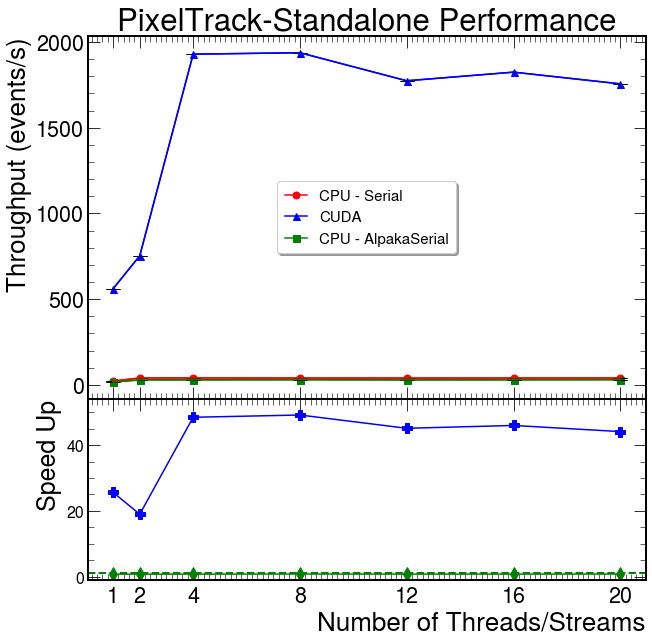

In [15]:
overlay3Thru(df_ser,'Serial',cuda1,'CUDA',df_alps,'AlpakaSerial')

In [10]:
def overlay2Thru(dataframe1,df1name,dataframe2,df2name,gpu='None'):
    #Usually df1=serial, df2=cuda, df3=alpakaserial
    
    cpu_ratioerror = stdDev(df_ser,df_alps)
    
    df_streams1 = dataframe1['nStreams']
    df_throughput1 = dataframe1['throughput']
    streams_pick1 = [df_streams1[0],df_streams1[1],df_streams1[3],df_streams1[7],df_streams1[11],df_streams1[15],df_streams1[19]]
    thru_std1 = dataframe1['tput_std']
    std_pick1 = [thru_std1[0],thru_std1[1],thru_std1[3],thru_std1[7],thru_std1[11],thru_std1[15],thru_std1[19]]
    thru_ave1 = dataframe1['tput_ave']
    ave_pick1 = [thru_ave1[0],thru_ave1[1],thru_ave1[3],thru_ave1[7],thru_ave1[11],thru_ave1[15],thru_ave1[19]]
    events_val1 = dataframe1['nEvents'].iat[0]

    df_streams2 = dataframe2['nStreams']
    df_throughput2 = dataframe2['throughput']
    streams_pick2 = [df_streams2[0],df_streams2[1],df_streams2[3],df_streams2[7],df_streams2[11],df_streams2[15],df_streams2[19]]
    thru_std2 = dataframe2['tput_std']
    std_pick2 = [thru_std2[0],thru_std2[1],thru_std2[3],thru_std2[7],thru_std2[11],thru_std2[15],thru_std2[19]]
    thru_ave2 = dataframe2['tput_ave']
    ave_pick2 = [thru_ave2[0],thru_ave2[1],thru_ave2[3],thru_ave2[7],thru_ave2[11],thru_ave2[15],thru_ave2[19]]
    events_val2 = dataframe2['nEvents'].iat[0]
    
    ratio1 = thru_ave2 / thru_ave1
    #std_ratio1 = statistics.stdev(ratio1)
    ratio13_pick = [ratio1[0],ratio1[1],ratio1[3],ratio1[7],ratio1[11],ratio1[15],ratio1[19]]
    #std_ratio1_pick = [std_ratio1_pick[0],std_ratio1_pick[1],std_ratio1_pick[3],std_ratio1_pick[7],std_ratio1_pick[11],std_ratio1_pick[15],std_ratio1_pick[19]]

    plt.style.use(hep.style.CMS)
    plt.figure(figsize = (20,10))

    gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
    fig = plt.subplots(2)
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1],sharex=ax1)

    if df1name == 'Serial' and df2name == 'AlpakaSerial' or df2name == 'AlpakaSerial' and df1name == 'Serial':
        ax1.plot([], [], ' ', label="CPU - Intel(R) Xeon(R) Silver 4114 CPU @ 2.20GHz")
        ax1.plot(streams_pick1,ave_pick1,'ro',markersize=7,linestyle='solid',label='CPU - ' + df1name)
        ax1.plot(streams_pick2,ave_pick2,'b^',markersize=7,linestyle='solid',label='CPU - ' + df2name)
        ax1.errorbar(streams_pick1,ave_pick1,yerr=std_pick1,fmt='r',ecolor='k',capsize=7, elinewidth=2,markeredgewidth=1)
        ax1.errorbar(streams_pick2,ave_pick2,yerr=std_pick1,fmt='b',ecolor='k',capsize=7, elinewidth=2,markeredgewidth=1)
        ax1.legend(loc='lower right',fontsize='xx-small',frameon=True,shadow=True)
        ax1.set(ylabel='Throughput (events/s)',title='PixelTrack-Standalone Performance')       
        
    if df1name == 'Serial' and df2name != 'AlpakaSerial' or df1name == 'AlpakaSerial' and df2name != 'Serial':
        ax1.plot(streams_pick1,ave_pick1,'ro',markersize=7,linestyle='solid',label='CPU - ' + df1name)
        ax1.plot(streams_pick2,ave_pick2,'b^',markersize=7,linestyle='solid',label=df2name)
        ax1.errorbar(streams_pick1,ave_pick1,yerr=std_pick1,fmt='r',ecolor='k',capsize=7, elinewidth=2,markeredgewidth=1)
        ax1.errorbar(streams_pick2,ave_pick2,yerr=std_pick1,fmt='b',ecolor='k',capsize=7, elinewidth=2,markeredgewidth=1)
        ax1.legend(loc='center',fontsize='xx-small',frameon=True,shadow=True)
        ax1.set(ylabel='Throughput (events/s)',title='PixelTrack-Standalone Performance')       
            
    if df1name != 'Serial' and df2name != 'Alpaka Serial' or df2name != 'AlpakaSerial' and df1name != 'Serial':
        if gpu != 'None':
            ax1.plot([], [], ' ', label="GPU - " + gpu)
            ax1.plot(streams_pick1,ave_pick1,'ro',markersize=7,linestyle='solid',label=df1name)
            ax1.plot(streams_pick2,ave_pick2,'b^',markersize=7,linestyle='solid',label=df2name)
            ax1.errorbar(streams_pick1,ave_pick1,yerr=std_pick1,fmt='r',ecolor='k',capsize=7, elinewidth=2,markeredgewidth=1)
            ax1.errorbar(streams_pick2,ave_pick2,yerr=std_pick1,fmt='b',ecolor='k',capsize=7, elinewidth=2,markeredgewidth=1)
            ax1.legend(loc='lower right',fontsize='xx-small',frameon=True,shadow=True)
            ax1.set(ylabel='Throughput (events/s)',title='PixelTrack-Standalone Performance')
                
    if df1name == df2name:
        print('Error: cannot overlay same data')

                
    ax2.plot(streams_pick1,ratio13_pick,'bP',markersize=10,label=df2name + ' : ' + df1name)
    plt.axhline(y=1,linewidth=2,linestyle='dashed',color='darkviolet')
    plt.xticks(streams_pick2)
    ax2.tick_params(axis='y',labelsize=16)
    ax2.errorbar(streams_pick1,ratio13_pick,yerr=cpu_ratioerror,fmt='b',ecolor='k',capsize=7, elinewidth=2,markeredgewidth=1)
    #ax2.legend(loc='center',fontsize='xx-small',frameon=True,shadow=True)
    ax2.set_xlabel('Number of Threads/Streams')
    ax2.set_ylabel('Speed Up',fontsize=25)
    
    if max(ratio13_pick) < 1:
        ax2.set_ylim(0,1.25)
        
    plt.subplots_adjust(hspace=.0)
    plot_title = mpng + df1name + df2name + '_' + gpu + '_' + str(events_val1) + 'e.png'
    
    logfile = mlog
    with open(logfile,"a") as myfile:
        myfile.write('\n')
        myfile.write(str(timestamp))
        myfile.write('\n')
        myfile.write('\t' + plot_title)
    
    plt.savefig(mpng + df1name + df2name + '_' + gpu + '_' + str(events_val1) + 'e.png')
    plt.show() 

In [ ]:
overlay2Thru(df_ser,'Serial',cuda1,'CUDA')

<Figure size 1440x720 with 0 Axes>

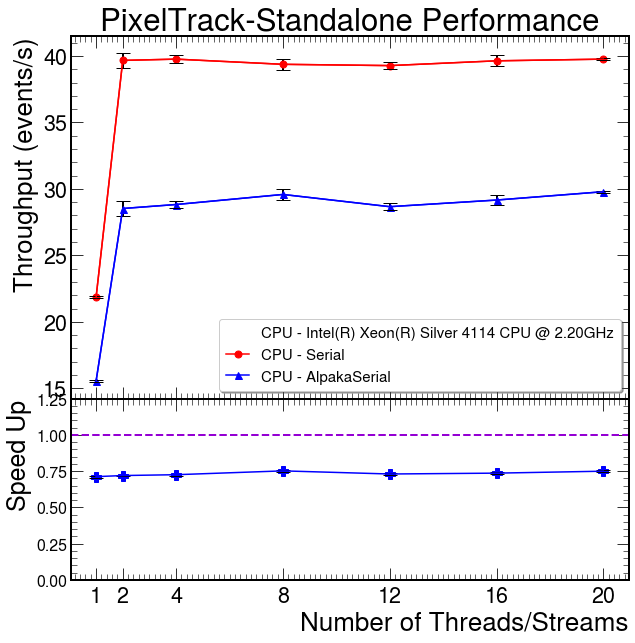

In [11]:
overlay2Thru(df_ser,'Serial',df_alps,'AlpakaSerial')

In [ ]:
overlay2Thru(cuda3,'CUDA',alpc3,'AlpakaCuda',gpu='TESLA_T4')